<a href="https://colab.research.google.com/github/kahuroA/Descriptive-Statistics-Excercises/blob/main/Copy_of_Univariate_Analysis_Exploratory_Data_Analysis_(Exercise_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis: Univariate Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Which subject performed best during the 2017 ACT test?

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [1]:
# Loading the Data from the source 
# ---
# Dataset url = http://bit.ly/2017ACTScoresDataset
# ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

score_df=pd.read_csv('http://bit.ly/2017ACTScoresDataset')

## 3. Checking the Data

In [2]:
# Determining the no. of records in our dataset
print('The dataset has {} rows and {} columns'.format(score_df.shape[0], score_df.shape[1]))

The dataset has 52 rows and 7 columns


In [3]:
# Previewing the top of our dataset
score_df.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [4]:
# Previewing the bottom of our dataset
score_df.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29%,23.5,23.3,24.6,23.5,23.8
48,Washington,29%,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


In [5]:
# Checking whether each column has an appropriate datatype
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

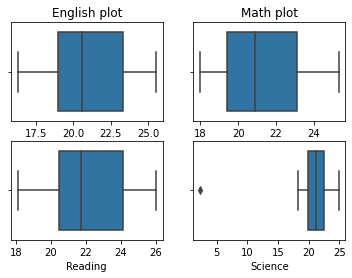

In [6]:
# Checking for Outliers
#first plot
plt.subplot(2,2,1)
sns.boxplot(x=score_df.English)
plt.title('English plot')
#second plot
plt.subplot(2,2,2)
sns.boxplot(x=score_df.Math)
plt.title('Math plot')
#third plot
plt.subplot(2,2,3)
sns.boxplot(x=score_df.Reading)

#fourth plot
plt.subplot(2,2,4)
sns.boxplot(x=score_df.Science)


plt.show()

In [7]:
# Checking for Anomalies
#let us check if there are duplicates
score_df.duplicated().sum()

0

In [8]:
#The composite column is not in integer form, let us convert it to integer
#before that, we notice that one of the values entered has an 'X' character at the end, therefore we will first remove that

def remove_X(val):
  new_val=val.replace('x','')
  return new_val

#let us run our function through the column
score_df['Composite']=score_df['Composite'].apply(lambda x: remove_X(x))

In [10]:
score_df['Composite']=score_df['Composite'].astype(float)

In [11]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


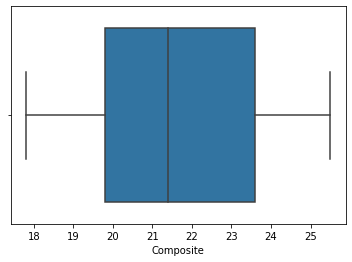

In [13]:
sns.boxplot(x=score_df['Composite'])

In [12]:
# Identifying the Missing Data
score_df.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [14]:
# Dealing with the Missing Data
#No missing data

In [15]:
# More data cleaning procedures
# let us remove outliers from the science column
score_df['Science'].describe()

count    52.000000
mean     21.040385
std       3.151113
min       2.300000
25%      19.900000
50%      21.150000
75%      22.525000
max      24.900000
Name: Science, dtype: float64

In [16]:
def IQR_Method(data, column):
  first_quartile, third_quartile=np.percentile(data[column], [25,75])
  iqr=third_quartile-first_quartile
  lower_limit=first_quartile-(1.5*iqr)
  upper_limit=third_quartile+(1.5*iqr)
  return data[(data[column]>=lower_limit) & (data[column]<=upper_limit)]

In [17]:
new_df=IQR_Method(score_df, 'Science')

In [18]:
new_df['Science'].describe()

count    51.000000
mean     21.407843
std       1.722306
min      18.200000
25%      19.950000
50%      21.300000
75%      22.750000
max      24.900000
Name: Science, dtype: float64

## 6. Exploratory Analysis

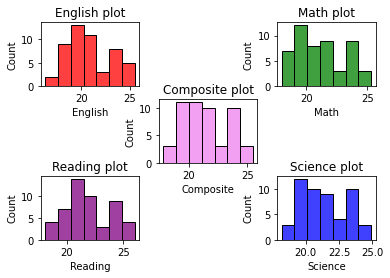

In [19]:
# Ploting the univariate summaries and recording our observations
plt.subplot(3,3,1)
sns.histplot(new_df.English, kde=False, color='red')
plt.title('English plot')
#second plot
plt.subplot(3,3,3)
sns.histplot(new_df.Math, kde=False, color='green')
plt.title('Math plot')
#third plot
plt.subplot(3,3,7)
sns.histplot(new_df.Reading, kde=False, color='purple')
plt.title('Reading plot')
#fourth plot
plt.subplot(3,3,9)
sns.histplot(new_df.Science, kde=False, color='blue')
plt.title('Science plot')

#fifth plot
plt.subplot(3,3,5)
sns.histplot(new_df.Composite, kde=False, color='violet')
plt.title('Composite plot')

plt.show()

## 7. Implementing the Solution

In [20]:
# Implementing the Solution
new_df.describe()

,English,Math,Reading,Science,Composite
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,20.872549,21.135294,21.958824,21.407843,21.468627
std,2.330672,1.963958,2.045109,1.722306,1.999849
min,16.300000,18.000000,18.100000,18.200000,17.800000
25%,19.000000,19.400000,20.450000,19.950000,19.800000
50%,20.400000,20.900000,21.600000,21.300000,21.400000
75%,22.900000,22.900000,23.650000,22.750000,23.200000
max,25.500000,25.300000,26.000000,24.900000,25.500000


In [21]:
#we will use the mean as the metric of our evaluation, based on the above, Reading was the best performed subject in all the states

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?